In [27]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import griddata
import subprocess as sp
from wipy.wipy_utils import utils
import scipy

input_model_path = "model_init_acoustic"
model_path = "gradient_model"

pars = ["x", "z", "rho", "vp", "vs"]

model = utils.load_model(input_model_path, pars)

In [28]:
# load toopography and make interpolation object 

topo = np.loadtxt('Field-Data/topo.txt')

h = 3.0
n_pad = 4


pad_l = np.array([min(topo[:,0]) - n_pad*h, topo[0,1]])
pad_r = np.array([max(topo[:,0]) + n_pad*h, topo[-1,1]])

topo = np.vstack((pad_l, topo, pad_r))

topo_interp = scipy.interpolate.interp1d(topo[:,0], topo[:,1])


In [29]:
for i in range(len(model["vp"])):
    model["vp"][i] = 450.0 + (80.0)*(topo_interp(model["x"][i]) - model["z"][i])

model["vp"][model["vp"] > 5000] = 5000

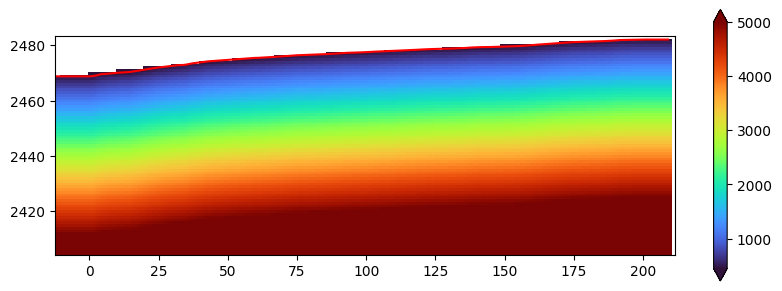

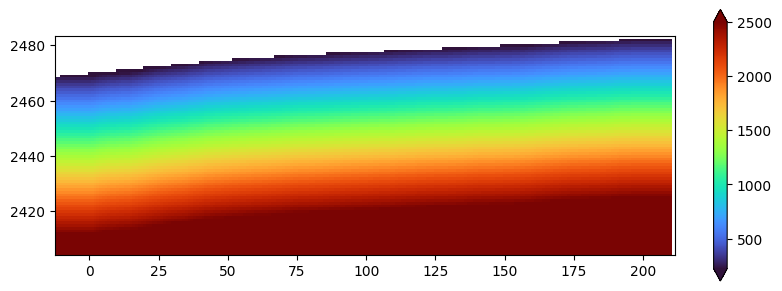

In [30]:

utils.plot_model_fast(model, 1, 'vp')
plt.plot(np.arange(-12, 210, 1), topo_interp(np.arange(-12, 210, 1)), "r")
plt.show()

# change vs field to 0.0
model['vs'] = model["vp"]*0.5
utils.plot_model_fast(model, 1, 'vs')
plt.show()

In [31]:
utils.write_model(model_path, model)